# Word Clouds with Masking Images

In [1]:
from rembg import remove 
from PIL import Image

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import numpy as np

## Images

``ONCE YOU HAVE A GOOD SILHOUETTE, SET BELOW TO FALSE TO AVOID OVERWRITING``

In [32]:
ImagesNotProcessed = False 

### Internet Images

In [24]:
if ImagesNotProcessed:
    from simple_image_download import simple_image_download as simp 
    response = simp.Downloader()
    keyword = "piano"
    try:
        response.download(keyword, 24)
        print("Images downloaded successfully.")
    except Exception as e:
        print("An error occurred:", e)

Images downloaded successfully.


``LOOK THROUGH /simple_images/ FOR A GOOD PICTURE.``\
``TAKE A SCREENSHOT OF THE CROPPED IMAGE YOU WANT.``\
``SAVE THAT FILE AS assets/<object name>.png``

### Strip Background

In [27]:
if ImagesNotProcessed:
    input_img = 'assets/piano2.png'
    output_img = 'assets/piano2_out.png'

    inp = Image.open(input_img)
    output = remove(inp)

    output.save(output_img)

### Silhouette

In [28]:
if ImagesNotProcessed:
    im = Image.open('assets/piano2_out.png')
    
    # Extract the alpha channel and threshold it at 200
    alpha = im.getchannel('A')
    alphaThresh = alpha.point(lambda p: 255 if p>200 else 0)
    
    # Make a new completely black image same size as original 
    res = Image.new('RGB', im.size)
    
    # Copy across the alpha channel from original
    res.putalpha(alphaThresh)
    res.save('assets/piano_sil.png')

``YOU MAY RUN INTO PROBLEMS IF THIS FILE IS TOO BIG.``\
``IF SO, TAKE A SCREENSHOT OF IT AND OVERWRITE THE SIL FILE. ``

## Text

``https://en.wikipedia.org/wiki/Kangaroo``\
``COPY ALL TEXT AND SAVE TO assets/<object_name>.txt``\
``RESOLVE ERRORS ON OPEN BY REMOVING PROBLEM TEXT``

In [14]:
data = open("assets/piano.txt", "r").read()

## Word Cloud

In [16]:
stopwords = set(STOPWORDS)
stop_list = []
for word in stop_list:
    STOPWORDS.add(word)
    STOPWORDS.add(' '+word)
    STOPWORDS.add(word+' ')
    STOPWORDS.add('  '+word)
    STOPWORDS.add(word+'  ')    

In [17]:
this_cloud = WordCloud()
this_cloud.generate(data)

In [29]:
this_mask = np.array(Image.open('assets/piano_sil2.png'))

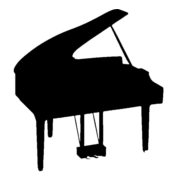

In [30]:
fig = plt.figure(figsize=(2,3))
plt.imshow(this_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

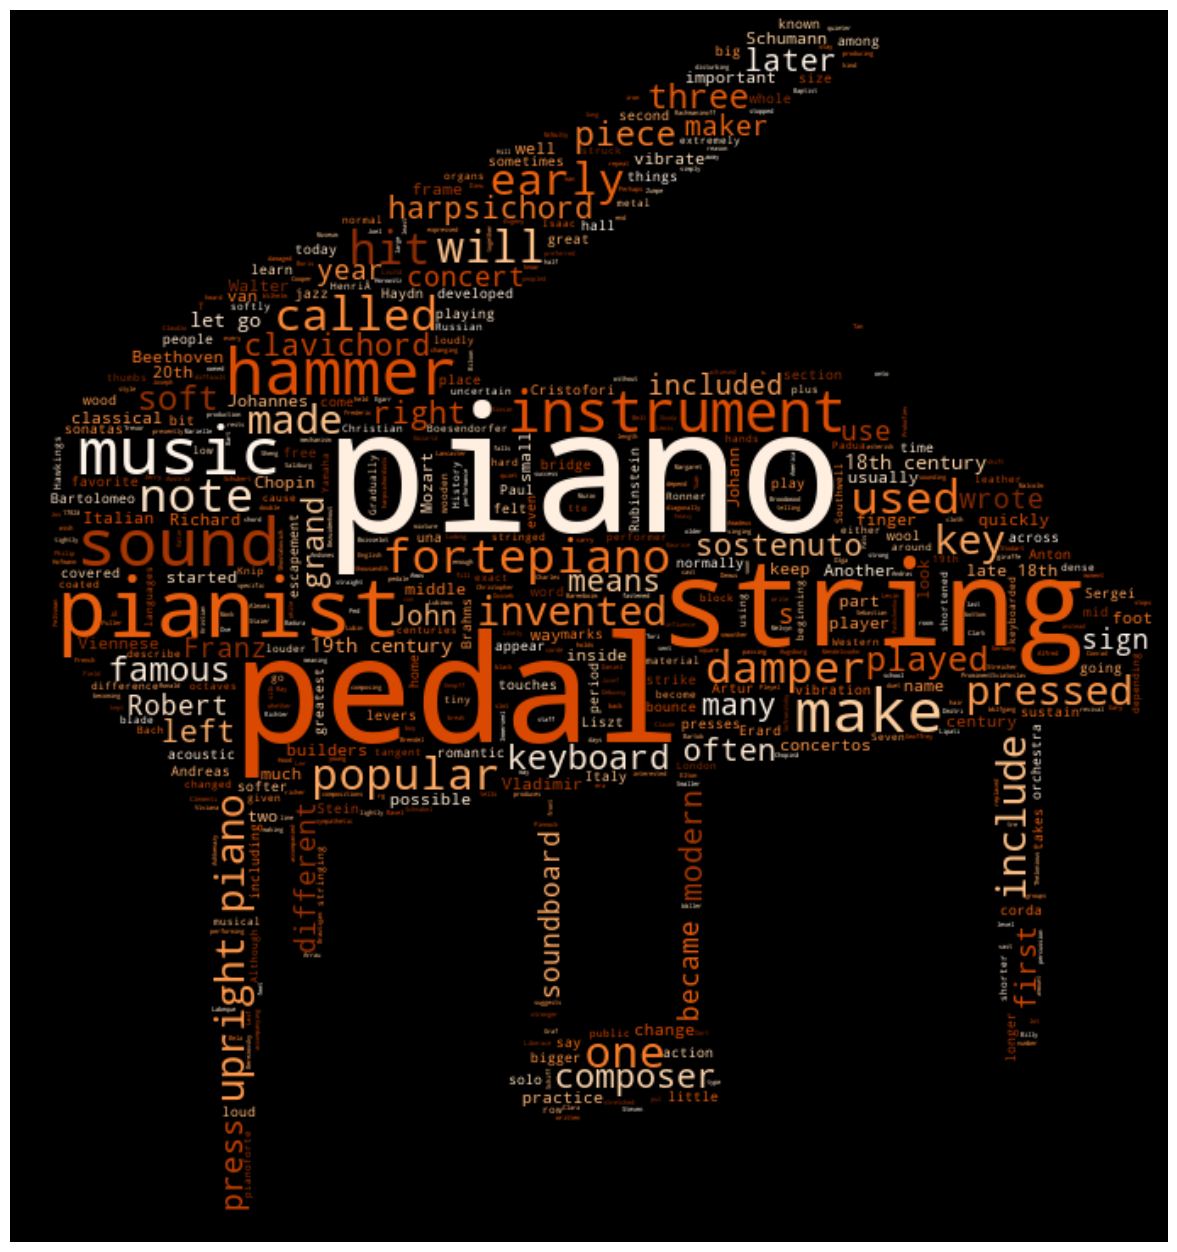

In [31]:
this_cloud = WordCloud(background_color='black', max_words=5000, mask=this_mask, colormap = "Oranges", stopwords=stopwords)
this_cloud.generate(data)
fig = plt.figure(figsize=(16,16))
plt.imshow(this_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()